In [2]:
#install 

!pip install nltk
!python -m nltk.downloader popular

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_da

mengambil keputusan untuk menikah bukan hal yang mudah banyak hal yang perlu dipertimbangkan termasuk kepribadian dan karakter calon pasangan beberapa perempuan mungkin memiliki kriteria laki laki idaman yang cocok untuk dijadikan pasangan di sisi lain sejumlah penelitian menunjukkan karakter laki laki ideal yang pantas dijadikan suami  berikut ulasannya seperti dilansir laman independent penelitian yang dilakukan di hanken school of economics di finlandia menunjukkan semakin pintar seseorang maka semakin kecil kemungkinannya untuk menikah selain itu laki laki yang lebih cerdas juga lebih mungkin untuk menikah dan setia hidup bersama laki laki yang memiliki rasa humor tentunya dapat membuat perasaan senang bagaimana tidak setiap hari pasti ada saja leluconnya yang bisa memancing tawa penelitian juga menunjukkan laki laki yang berhasil dalam pernikahannya memiliki rasa humor suatu penelitian menemukan suami adalah faktor penentu dalam dua pertiga keputusan perempuan terhadap kariernya a

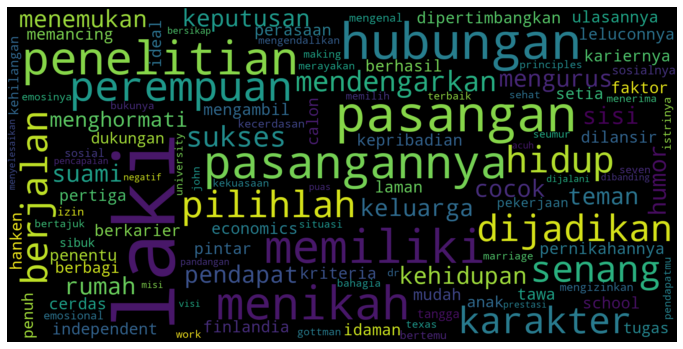

In [3]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup as bs
import requests
import re
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


user_agent='Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36'
headers = {'User-Agent': user_agent,'Accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8'}


#ambil data (Web Scrapping)
alamat = "https://lifestyle.kompas.com/read/2020/10/16/203104920/hai-perempuan-jangan-lepaskan-pria-dengan-9-karakter-ini?page=all#page2"
req = Request(alamat, headers=headers)
html = urlopen(req)


data = bs(html, 'html.parser')
artikel = data.find("div",{"class":"read__content"})

hidelabel = artikel.findAll('strong')
for delete in hidelabel:
    delete.decompose()

items = artikel.findAll('p')
hasil = [item.get_text() for item in items]

#data praproses
hasil = [item.lower() for item in hasil]
hasil = [' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", item).split()) for item in hasil]
paragraf = ' '.join(hasil)
print(paragraf)
print("----------------------------------------")

stop_words = set(stopwords.words('indonesian'))
word_tokens = word_tokenize(paragraf) 
paragraf_2 = ' '.join([w for w in word_tokens if not w in stop_words])
print(paragraf_2)
print('----------------------------------------')

#visualisasi
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(paragraf_2)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()